In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import mpl_toolkits
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [3]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,time,serum_creatinine,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,130,1,0,4,1.9,1
1,55.0,0,7861,0,38,0,263358.03,136,1,0,6,1.1,1
2,65.0,0,146,0,20,0,162000.00,129,1,1,7,1.3,1
3,50.0,1,111,0,20,0,210000.00,137,1,0,7,1.9,1
4,65.0,1,160,1,20,0,327000.00,116,0,0,8,2.7,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_sodium              299 non-null    int64  
 8   sex                       299 non-null    int64  
 9   smoking                   299 non-null    int64  
 10  time                      299 non-null    int64  
 11  serum_creatinine          299 non-null    float64
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_sodium                0
sex                         0
smoking                     0
time                        0
serum_creatinine            0
DEATH_EVENT                 0
dtype: int64

In [6]:
#no duplicated record in dataset
data.duplicated().any()

False

In [7]:
import seaborn as sns
sns.set_theme(style="whitegrid")

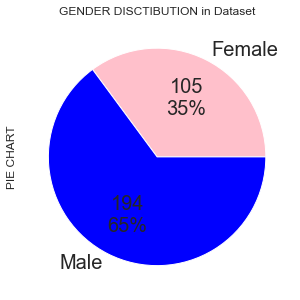

In [8]:
#PIE CHART
New_sex = data.copy(deep=True)
New_sex=data.replace({'sex' : { 0 :"Female", 1 :"Male"}})

def label_function(val):
    return f'{val / 100 * len(New_sex):.0f}\n{val:.0f}%'

fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))

New_sex.groupby('sex').size().plot(kind='pie',autopct=label_function,textprops={'fontsize': 20},
                                  colors=['pink', 'blue'], ax=ax1)
plt.title("GENDER DISCTIBUTION in Dataset")
plt.ylabel("PIE CHART")
plt.show()


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

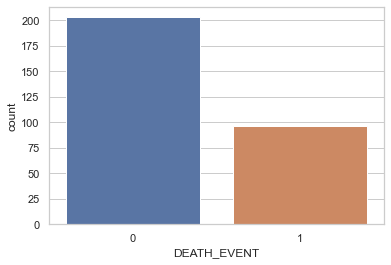

In [9]:
df = data
sns.countplot(x=data["DEATH_EVENT"])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

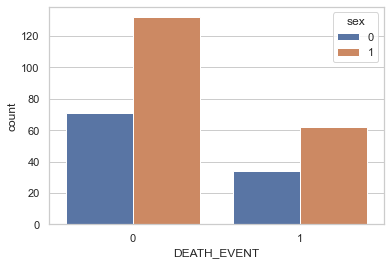

In [10]:
sns.countplot(data=df, x="DEATH_EVENT", hue="sex")

<AxesSubplot:>

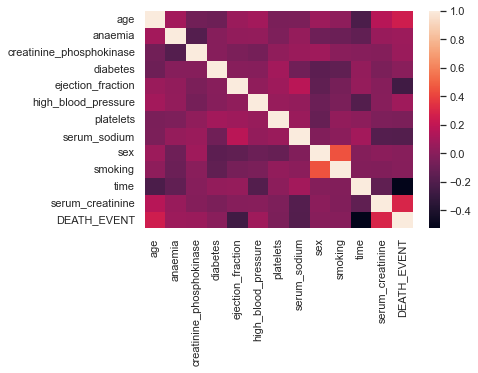

In [11]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [12]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,time,serum_creatinine,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,-0.045966,0.065430,0.018668,-0.224068,0.159187,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.041882,-0.094769,-0.107290,-0.141414,0.052174,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,0.059550,0.079791,0.002421,-0.009346,-0.016408,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.089551,-0.157730,-0.147173,0.033726,-0.046975,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,0.175902,-0.148386,-0.067315,0.041729,-0.011302,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,0.037109,-0.104615,-0.055711,-0.196439,-0.004935,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,0.062125,-0.125120,0.028234,0.010514,-0.041198,-0.049139
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,1.000000,-0.027566,0.004813,0.087640,-0.189095,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,-0.027566,1.000000,0.445892,-0.015608,0.006970,-0.004316
smoking,0.018668,-0.107290,0.002421,-0.147173,-0.067315,-0.055711,0.028234,0.004813,0.445892,1.000000,-0.022839,-0.027414,-0.012623


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

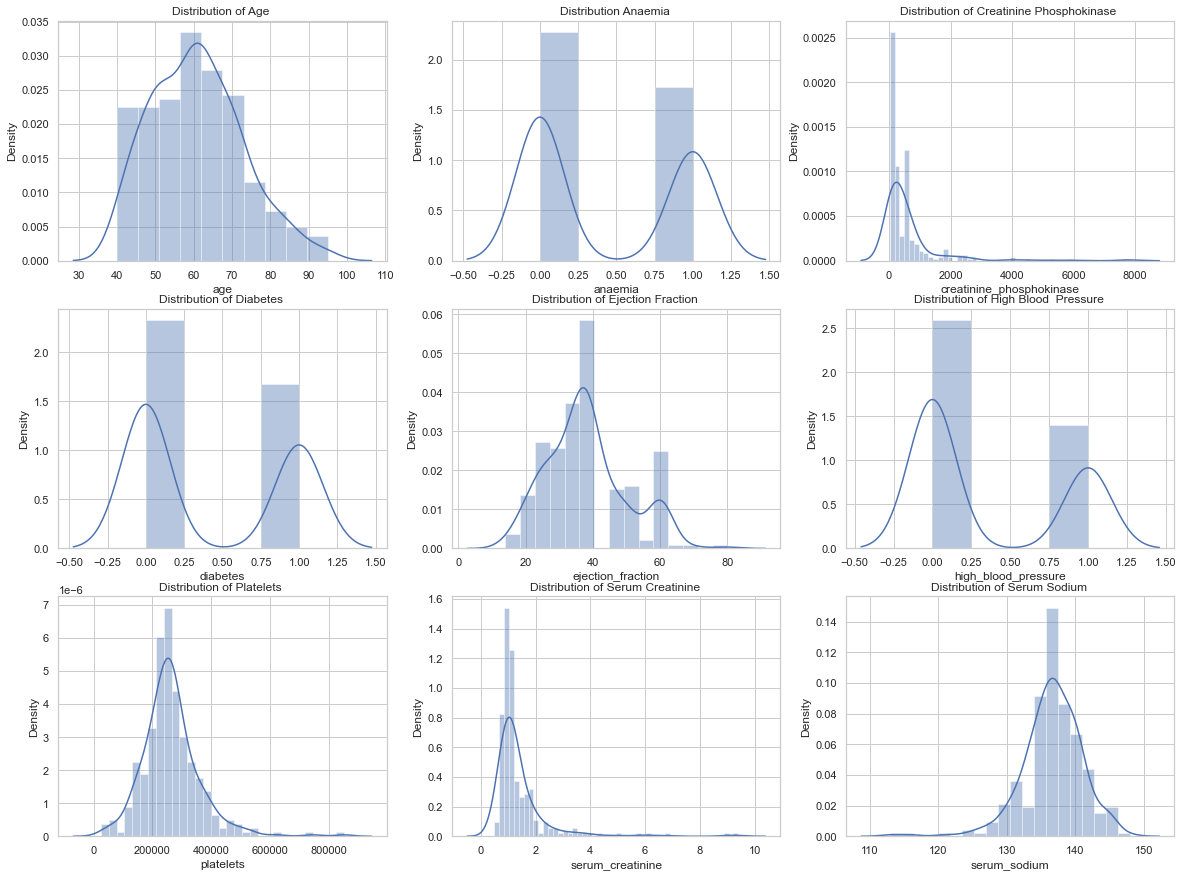

In [13]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.title('Distribution of Age ')
sns.distplot(data.age)


plt.subplot(3,3,2)
plt.title('Distribution Anaemia ')
sns.distplot(data.anaemia)



plt.subplot(3,3,3)
plt.title('Distribution of Creatinine Phosphokinase ')
sns.distplot(data.creatinine_phosphokinase)


plt.subplot(3,3,4)
plt.title('Distribution of Diabetes ')
sns.distplot(data.diabetes)

plt.subplot(3,3,5)
plt.title('Distribution of Ejection Fraction ')
sns.distplot(data.ejection_fraction)


plt.subplot(3,3,6)
plt.title('Distribution of High Blood  Pressure ')
sns.distplot(data.high_blood_pressure)

plt.subplot(3,3,7)
plt.title('Distribution of Platelets ')
sns.distplot(data.platelets)

plt.subplot(3,3,8)
plt.title('Distribution of Serum Creatinine ')
sns.distplot(data.serum_creatinine)


plt.subplot(3,3,9)
plt.title('Distribution of Serum Sodium ')
sns.distplot(data.serum_sodium)




plt.show()


In [14]:
#dff = sns.pairplot(df.drop('DEATH_EVENT', axis = 1))

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

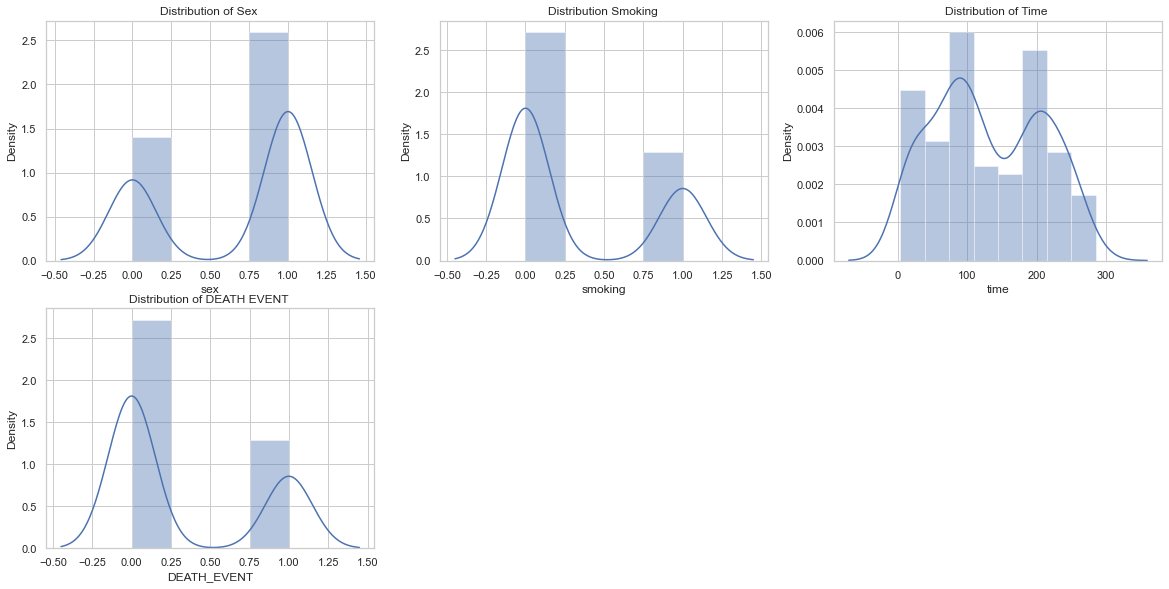

In [15]:

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.title('Distribution of Sex ')
sns.distplot(data.sex)


plt.subplot(3,3,2)
plt.title('Distribution Smoking ')
sns.distplot(data.smoking)



plt.subplot(3,3,3)
plt.title('Distribution of Time ')
sns.distplot(data.time)

plt.subplot(3,3,4)
plt.title('Distribution of DEATH EVENT ')
sns.distplot(data.DEATH_EVENT)


plt.show()

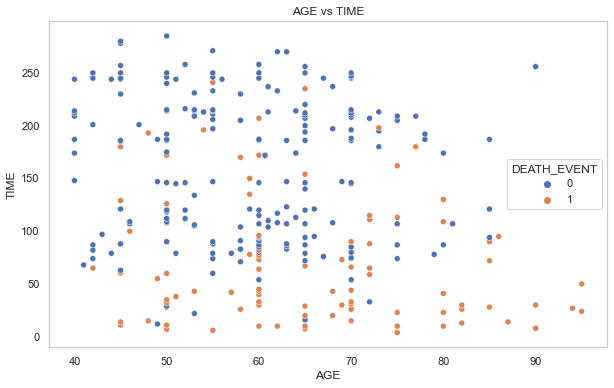

In [16]:

plt.figure(figsize=(10,6))
X2 = data["age"]
X1 = data["time"]
sns.scatterplot(x=X2,y=X1,hue="DEATH_EVENT",data=data)
plt.xlabel('AGE')
plt.ylabel('TIME')
plt.title('AGE vs TIME')
plt.grid()


In [17]:
#data seperation
X= data.iloc[:,0:12]
y = data.iloc[:,12:]

#normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns)
scaled_df.head()


     

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,time,serum_creatinine
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.485714,1.0,0.0,0.000000,0.157303
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.657143,1.0,0.0,0.007117,0.067416
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.457143,1.0,1.0,0.010676,0.089888
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.685714,1.0,0.0,0.010676,0.157303
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.085714,0.0,0.0,0.014235,0.247191


plt.figure(figsize=(10,6))
X2 = data["age"]
X1 = data["time"]
sns.scatterplot(x=X2,y=X1,hue="DEATH_EVENT",data=data)
plt.xlabel('AGE')
plt.ylabel('TIME')
plt.title('AGE vs TIME')
plt.grid()

In [18]:

#x.shape

In [19]:
#from sklearn.model_selection import train_test_split
#from sklearn import datasets
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100)

In [20]:
#data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2)

In [21]:
#creatind logestic model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()



In [22]:
#training model
model.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [23]:
model.score(X_train,y_train)

0.8229665071770335

In [24]:
model.intercept_


array([0.00015715])

In [25]:

model.coef_


array([[ 4.66530449e-02,  8.64191427e-05,  2.93521943e-04,
         5.24106822e-05, -6.35008887e-02, -1.47713241e-04,
        -1.34935873e-06,  7.17633306e-03, -1.72628161e-04,
        -4.91763441e-04, -1.74733086e-02,  6.16506782e-03]])

In [26]:

y_pred = model.predict(X_test)

In [27]:
X_test['actuals'] = y_test

In [28]:

X_test['pred'] = y_pred

In [29]:

#X_test.head()


In [30]:
from sklearn.metrics import confusion_matrix, classification_report


In [31]:
confusion_matrix(y_test,X_test['pred'])


array([[60,  6],
       [ 7, 17]], dtype=int64)

In [32]:
confu_matrix=classification_report(y_test,X_test['pred'])
print(classification_report(y_test,X_test['pred']))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90        66
           1       0.74      0.71      0.72        24

    accuracy                           0.86        90
   macro avg       0.82      0.81      0.81        90
weighted avg       0.85      0.86      0.85        90



In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred))
confu_matrix=confusion_matrix(y_test,y_pred)
print(confu_matrix)


              precision    recall  f1-score   support

           0       0.90      0.91      0.90        66
           1       0.74      0.71      0.72        24

    accuracy                           0.86        90
   macro avg       0.82      0.81      0.81        90
weighted avg       0.85      0.86      0.85        90

[[60  6]
 [ 7 17]]


In [34]:
#####################logestic model whit Hyperparameter##################

In [35]:
logModel=LogisticRegression()

In [36]:
param_grid=[
    {'penalty':['l1','l2','elasticnet','none'],
    "C":np.logspace(-4,4,20),
    'solver':['lbfgs','newton-cg','linlinear','sag','saga'],
    'max_iter':[100,1000,2500,5000]}
]

In [37]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(logModel,param_grid=param_grid,cv=3,verbose=True,n_jobs=-1)

In [38]:
best_clf=clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2640 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

In [39]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, max_iter=1000, penalty='none', solver='newton-cg')

In [40]:
print(f'Accuracy -: {best_clf.score(X,y):.3f}')

Accuracy -: 0.856


[[60  6]
 [ 7 17]]


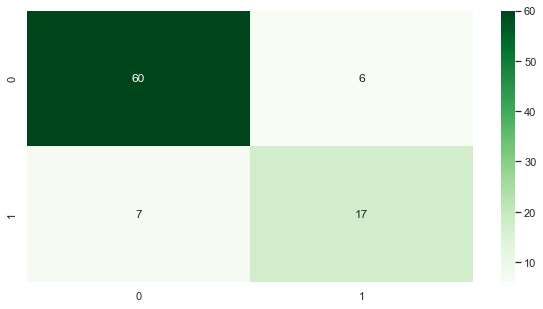

In [44]:
import seaborn as sns

confu_matrix=confusion_matrix(y_test,y_pred)
print(confu_matrix)

plt.figure(figsize=(10,5)) 

sns.heatmap(confu_matrix, annot = True, cmap = 'Greens')
plt.show()


In [41]:
######################Decision Tree#####################

In [46]:
features=['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_sodium','sex','smoking','time','serum_creatinine']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [48]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5)

In [49]:
model1 = clf_gini.fit(X,y) 

In [50]:
y_pred_gini = model1.predict(X)

In [51]:
confusion_matrix(y,y_pred_gini)

array([[184,  19],
       [ 20,  76]], dtype=int64)

In [52]:
print(classification_report(y,y_pred_gini))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       203
           1       0.80      0.79      0.80        96

    accuracy                           0.87       299
   macro avg       0.85      0.85      0.85       299
weighted avg       0.87      0.87      0.87       299



In [53]:
#max_depth
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

#tree.plot_tree(dtree, feature_names=features)


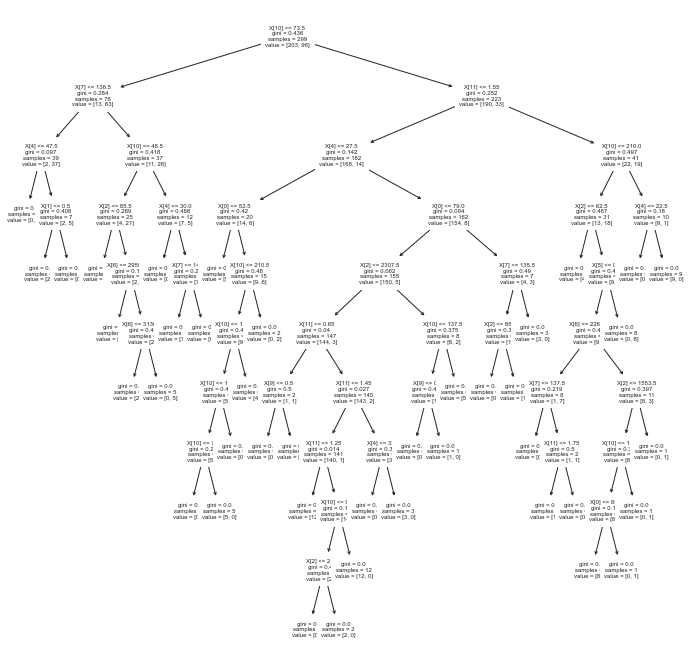

In [54]:
plt.figure(figsize=(12,12))
tree.plot_tree(dtree, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

In [55]:
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

In [56]:
estimator = tree.DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3, min_samples_leaf=5)
estimator.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

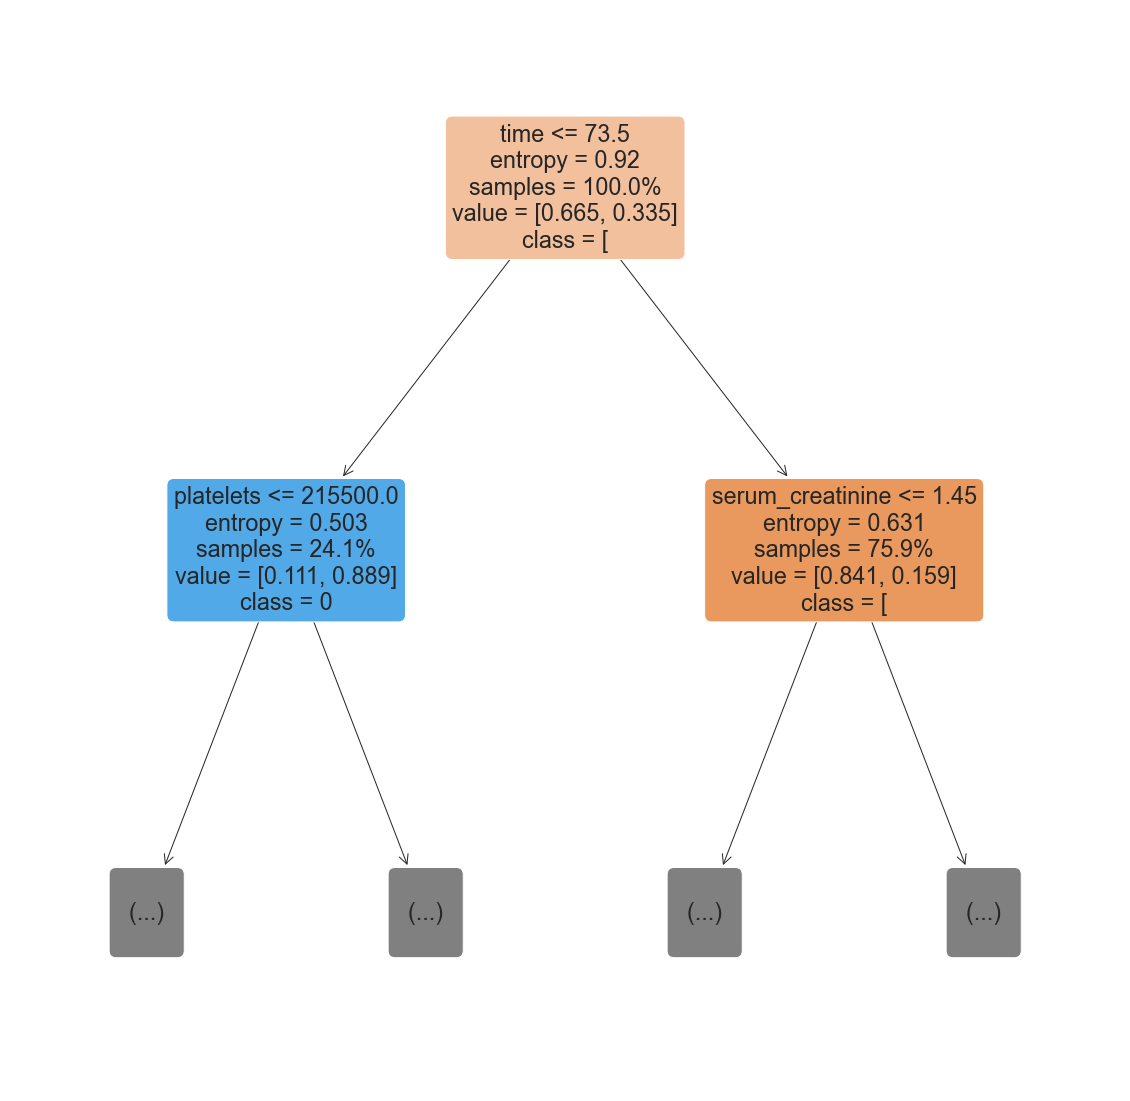

In [57]:
plt.figure(figsize = (20,20))
tree.plot_tree(estimator
          , filled=True
          , feature_names = X.columns
          , class_names = str(estimator.classes_)
          , rounded = True
          , proportion = True
          , max_depth = 1
              );


In [58]:
#Let's see how it works on training data
train_pred=estimator.predict(X_train)
print(accuracy_score(train_pred,y_train)*100)


87.5


In [59]:
X_test.shape

(75, 12)

In [60]:
test_pred = estimator.predict(X_test)
accuracy_test = accuracy_score(test_pred,y_test)*100
print('The accuracy on test set is '+str(accuracy_test))
fitted_max_depth = estimator.tree_.max_depth
parameter_values = range(1,fitted_max_depth+1)
print('The maximum depth of the fitted tree is '+str(fitted_max_depth))


The accuracy on test set is 80.0
The maximum depth of the fitted tree is 3


In [61]:
X_train_t,X_val,y_train_t,y_val = train_test_split(X_train,y_train,test_size=0.25)
print('There are '+str(len(X_train_t))+' in the training dataset')
print('There are '+str(len(X_val))+' in the validation dataset')


There are 168 in the training dataset
There are 56 in the validation dataset


In [62]:
scores = []
for par in parameter_values:
    estimator = tree.DecisionTreeClassifier(max_depth=par,criterion='entropy')
    Tune_fit=estimator.fit(X_train_t,y_train_t)
    val_pred=estimator.predict(X_val)
    score=accuracy_score(val_pred,y_val)
    scores.append(score)
print(scores)

[0.9464285714285714, 0.9464285714285714, 0.9107142857142857]


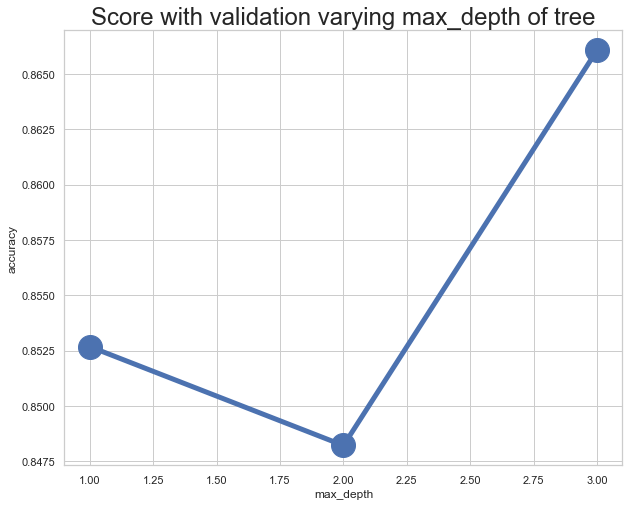

In [74]:
plt.figure(figsize=(10,8))
plt.plot(parameter_values, scores, '-o', linewidth=5, markersize=24)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Score with validation varying max_depth of tree", fontsize = 24)
plt.show();


In [75]:
par = np.argmax(scores)
print('The top accuracy is '+str(np.max(scores)))
estimator = tree.DecisionTreeClassifier(max_depth=par,criterion='entropy')
estimator.fit(X_train,y_train)
y_pred=estimator.predict(X_test)
final_accuracy=accuracy_score(y_pred,y_test)
print('Obtained with max_depth= '+str(par))


The top accuracy is 0.8660714285714286
Obtained with max_depth= 2


In [76]:
scores=[]
for par in parameter_values:
    estimator=tree.DecisionTreeClassifier(max_depth=par,criterion='entropy')
    score=cross_val_score(estimator,X_train,y_train,scoring='accuracy',cv=5)
    scores.append(np.mean(score))
print(scores)

[0.8525252525252525, 0.8525252525252525, 0.8167676767676768]


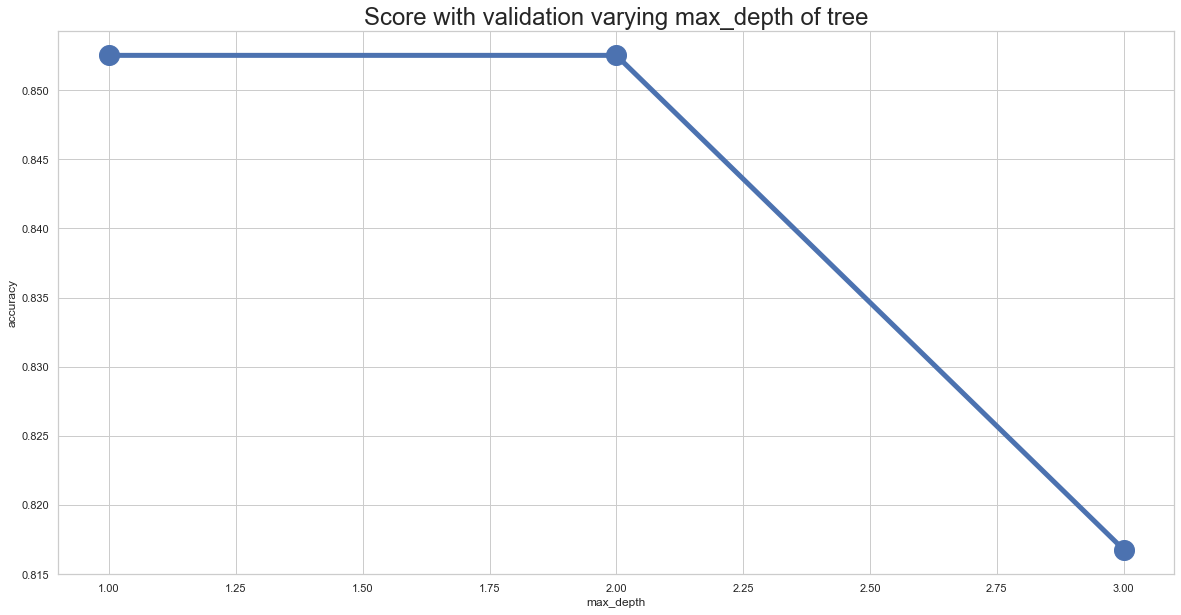

In [77]:
plt.figure(figsize=(20,10))
plt.plot(parameter_values,scores,'-o',linewidth=5,markersize=20)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Score with validation varying max_depth of tree", fontsize = 24)
plt.show();


In [67]:
par = np.argmax(scores)
estimator=tree.DecisionTreeClassifier(max_depth=par+1,criterion='entropy')
estimator.fit(X_train,y_train)
y_predicted=estimator.predict(X_test)
accuracy_final = accuracy_score(y_predicted,y_test)
print('The accuracy on test set tuned with cross_validation is '+str(accuracy_final)+' with depth '+str(par))


The accuracy on test set tuned with cross_validation is 0.8266666666666667 with depth 0


In [68]:
print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.89      0.87      0.88        54
           1       0.68      0.71      0.70        21

    accuracy                           0.83        75
   macro avg       0.78      0.79      0.79        75
weighted avg       0.83      0.83      0.83        75



In [69]:
scores = []
#scores2 = []
for par in parameter_values:
    
#    estimator_bagging = tree.DecisionTreeClassifier(criterion="entropy", max_depth = par)
    estimator_bagging = BaggingClassifier(tree.DecisionTreeClassifier(criterion="entropy", max_depth = par)
                                     , max_samples=0.5, max_features=0.5)
    estimator_fit = estimator_bagging.fit(X_train,y_train)
    y_pred = estimator_bagging.predict(X_train)
#    y_pred_test = estimator_bagging.predict(X_test)
    score = accuracy_score(y_pred,y_train)
#    score_test = accuracy_score(y_pred_test,y_test)
    scores.append(score)
#    scores2.append(score_test)
print(scores)
#print(scores2)

[0.8526785714285714, 0.8482142857142857, 0.8660714285714286]


C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


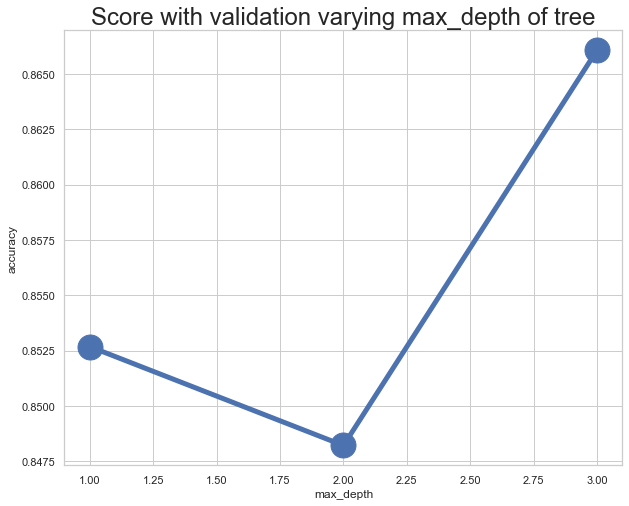

In [70]:
plt.figure(figsize=(10,8))
plt.plot(parameter_values,scores,'-o',linewidth=5,markersize=25)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Score with validation varying max_depth of tree", fontsize = 24)
plt.show();
